In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import pySW4 as sw4
asterdir = './'

# Read an unzipped GeoTIFF file

In [2]:
tif = sw4.utils.read_GeoTIFF(asterdir + '/ASTGTM2_N32E035/ASTGTM2_N32E035_dem.tif')
print tif


GeoTIFF info:
name: ASTGTM2_N32E035_dem.tif
west: 34.9998611111
east: 36.0001388889
south: 31.9998611111
north: 33.0001388889
x pixel size: 0.000277777777778
y pixel size: -0.000277777777778
# of x pixels: 3601
# of y pixels: 3601
no data value: None
data type: <type 'numpy.int16'>
proj4: +proj=longlat +datum=WGS84 +no_defs 



# Plot the data

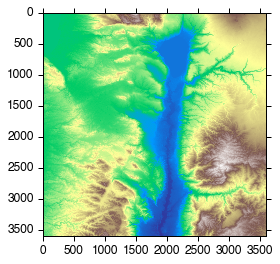

In [3]:
plt.imshow(tif.elev, cmap='terrain')

# Plot the same data with geographical extent

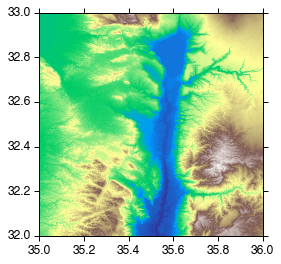

In [4]:
plt.imshow(tif.elev, cmap='terrain', extent=tif.extent)

# Reproject the data to UTM36 and plot


GeoTIFF info:
name: dst_temp.tif
west: 686833.952226
east: 783450.06104
south: 3542178.24718
north: 3655301.63086
x pixel size: 28.5592990875
y pixel size: -28.5592990875
# of x pixels: 3383
# of y pixels: 3961
no data value: None
data type: <type 'numpy.int16'>
proj4: +proj=utm +zone=36 +datum=WGS84 +units=m +no_defs 



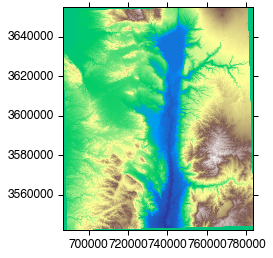

In [5]:
tif.reproject(epsg=32636)
print tif
plt.imshow(tif.elev, cmap='terrain', extent=tif.extent)

# Resample to 100 m spacing


GeoTIFF info:
name: dst_temp.tif
west: 686833.952226
east: 783450.06104
south: 3542178.24718
north: 3655301.63086
x pixel size: 100.120320014
y pixel size: -100.109189102
# of x pixels: 966
# of y pixels: 1131
no data value: None
data type: <type 'numpy.int16'>
proj4: +proj=utm +zone=36 +datum=WGS84 +units=m +no_defs 



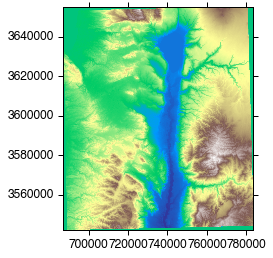

In [6]:
tif.resample(to=100)
print tif
plt.imshow(tif.elev, cmap='terrain', extent=tif.extent)

# Save as new GeoTIFF file


GeoTIFF info:
name: utm.36.100m.tif
west: 686833.952226
east: 783550.18136
south: 3542078.13799
north: 3655301.63086
x pixel size: 100.120320014
y pixel size: -100.109189102
# of x pixels: 966
# of y pixels: 1131
no data value: nan
data type: <type 'numpy.int16'>
proj4: +proj=utm +zone=36 +datum=WGS84 +units=m +no_defs 



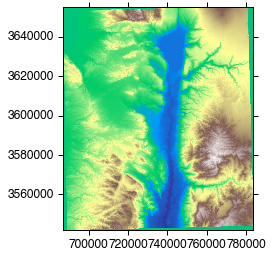

In [7]:
tif.write_GeoTIFF('utm.36.100m.tif')

# read the saved file and plot to see the data
tif = sw4.utils.read_GeoTIFF('utm.36.100m.tif')
print tif
plt.imshow(tif.elev, cmap='terrain', extent=tif.extent)

# Stitch several GeoTIFF files together

Note the warnings generated for every missing tile

/Users/Shahar/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/pySW4/utils/geo.py:521: UserWarning: Warning! missing file /Users/Shahar/data/AsterGDEM/ASTGTM2_N28E031.zip. Replacing tile with zeros.
  warnings.warn(msg.format(fullname + '.zip'))
/Users/Shahar/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/pySW4/utils/geo.py:521: UserWarning: Warning! missing file /Users/Shahar/data/AsterGDEM/ASTGTM2_N29E031.zip. Replacing tile with zeros.
  warnings.warn(msg.format(fullname + '.zip'))
/Users/Shahar/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/pySW4/utils/geo.py:521: UserWarning: Warning! missing file /Users/Shahar/data/AsterGDEM/ASTGTM2_N30E031.zip. Replacing tile with zeros.
  warnings.warn(msg.format(fullname + '.zip'))
/Users/Shahar/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/pySW4/utils/geo.py:521: UserWarning: Warning! missing file /Users/Shahar/data/AsterGDEM/ASTGTM2_N31E031.zip. Replacing tile with zeros.
  w


GeoTIFF info:
west: 30.9998611111
east: 37.0001388889
south: 27.9998611111
north: 34.0001388889
x pixel size: 0.0279082687339
y pixel size: -0.0279082687339
# of x pixels: 216
# of y pixels: 216
no data value: None
data type: <type 'numpy.int16'>
proj4: +proj=longlat +datum=WGS84 +no_defs 



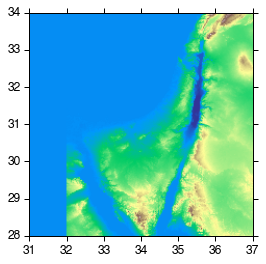

In [8]:
w,e,s,n = 31, 37, 28, 34
mosaic = sw4.utils.get_dem(asterdir, w,e,s,n)
mosaic.resample(by=0.01)
print mosaic
plt.imshow(mosaic.elev, cmap='terrain', extent=mosaic.extent)

# Plot with basemap

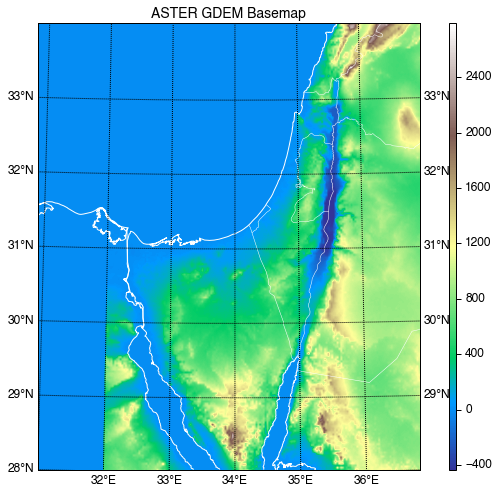

In [9]:
fig, ax = plt.subplots(figsize=(8,8))
m = Basemap(llcrnrlon=w, llcrnrlat=s,
            urcrnrlon=e, urcrnrlat=n,
            resolution='h', projection='lcc',
            lon_0=0.5*(w+e), lat_0=0.5*(s+n),
            area_thresh=1000, ax=ax)

dh = 100.
nx = int((m.xmax-m.xmin)/dh)+1; ny = int((m.ymax-m.ymin)/dh)+1
data = m.transform_scalar(mosaic.elev[::-1],mosaic.x,mosaic.y[::-1],nx,ny)
im = m.imshow(data,cmap='terrain')
m.colorbar(im,"right", size=0.1, pad=0.4)

m.drawcoastlines(color='w')
m.drawcountries(color='w')

parallels = np.arange(s,n,1.)
m.drawparallels(parallels,labels=[1,1,0,0])
meridians = np.arange(w,e,1.)
m.drawmeridians(meridians,labels=[0,0,0,1])

ax.set_title('ASTER GDEM Basemap')
